# Objective: 
    
In this notebook, we will build a neural network to classifiy the image based on the object present in the image.

# Dataset Info:
    
MNIST database of handwritten digits
Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Source: https://www.kaggle.com/warisali2/mnist-database-of-handwritten-digits

# Advanced techniques for training neural networks:
    
Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### 1. Load Libraries and dataset and do experimentation on dataset

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

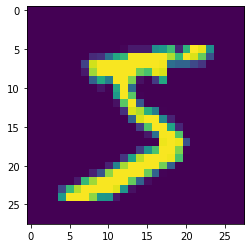

Label:  7


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

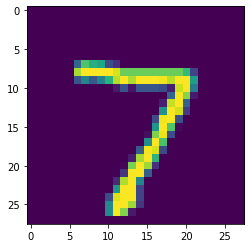

Label:  7


In [5]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### 2. Data Pre-processing

In [0]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### 3. Basic NN model

#### Naive MLP model without any alterations

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

In [10]:
model = Sequential()

In [11]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size = 2, epochs = 10, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 131s 2ms/step - loss: 1.7444 - acc: 0.3624
Epoch 2/10
60000/60000 [==============================] - 127s 2ms/step - loss: 1.5399 - acc: 0.4282
Epoch 3/10
60000/60000 [==============================] - 128s 2ms/step - loss: 1.5111 - acc: 0.4448
Epoch 4/10
60000/60000 [==============================] - 127s 2ms/step - loss: 1.3233 - acc: 0.5282
Epoch 5/10
60000/60000 [==============================] - 127s 2ms/step - loss: 1.1752 - acc: 0.5684
Epoch 6/10
60000/60000 [==============================] - 127s 2ms/step - loss: 1.1823 - acc: 0.5604
Epoch 7/10
60000/60000 [==============================] - 126s 2ms/step - loss: 1.2539 - acc: 0.5331
Epoch 8/10
60000/60000 [==============================] - 126s 2ms/step - loss: 1.1898 - acc: 0.5632
Epoch 9/10
60000/60000 [==============================] - 126s 2ms/step - loss: 1.0402 - a

In [14]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 54us/step


In [15]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7012


## Now, we will train Neural network using below techniques

### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem 
up to some degree

Ref: https://keras.io/initializers/

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [17]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)


Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 2.5209 - acc: 0.0993
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 2.3585 - acc: 0.1270
Epoch 3/100
60000/60000 [==============================] - 1s 24us/step - loss: 2.3173 - acc: 0.1195
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 2.3044 - acc: 0.1124
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 2.2997 - acc: 0.1124
Epoch 6/100
60000/60000 [==============================] - 1s 25us/step - loss: 2.2975 - acc: 0.1124
Epoch 7/100
60000/60000 [==============================] - 1s 25us/step - loss: 2.2963 - acc: 0.1124
Epoch 8/100
60000/60000 [==============================] - 1s 24us/step - loss: 2.2954 - acc: 0.1125
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 2.2945 - acc: 0.1138
Epoch 10/100
60000/60000 [==============================] - 1s 24us/step - loss: 2.2938 - 

In [18]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


In [19]:
print('Test accuracy: ', results[1])

Test accuracy:  0.2742


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [21]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 1.3624 - acc: 0.7698
Epoch 2/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.3705 - acc: 0.8935
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.2949 - acc: 0.9147
Epoch 4/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.2546 - acc: 0.9256
Epoch 5/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2270 - acc: 0.9321
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.2091 - acc: 0.9380
Epoch 7/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1937 - acc: 0.9427
Epoch 8/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1809 - acc: 0.9456
Epoch 9/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1700 - acc: 0.9488
Epoch 10/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1612 - a

In [22]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/step


In [23]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9419


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [0]:
from keras.layers import BatchNormalization, Dropout

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


Epoch 1/20
60000/60000 [==============================] - 23s 381us/step - loss: 1.4179 - acc: 0.5805
Epoch 2/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.7631 - acc: 0.8115
Epoch 3/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.5700 - acc: 0.8536
Epoch 4/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.4773 - acc: 0.8742
Epoch 5/20
60000/60000 [==============================] - 21s 350us/step - loss: 0.4192 - acc: 0.8865
Epoch 6/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.3836 - acc: 0.8939
Epoch 7/20
60000/60000 [==============================] - 21s 350us/step - loss: 0.3529 - acc: 0.9019
Epoch 8/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.3334 - acc: 0.9063
Epoch 9/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.3128 - acc: 0.9118
Epoch 10/20
60000/60000 [==============================] - 21s 354us/step - loss:

In [27]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 93us/step


In [28]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9552


### 4. Dropout

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [30]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.7487 - acc: 0.7724
Epoch 2/10
60000/60000 [==============================] - 27s 458us/step - loss: 0.4207 - acc: 0.8779
Epoch 3/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.3596 - acc: 0.8987
Epoch 4/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.3205 - acc: 0.9092
Epoch 5/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.3009 - acc: 0.9145
Epoch 6/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.2805 - acc: 0.9198
Epoch 7/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.2612 - acc: 0.9254
Epoch 8/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.2542 - acc: 0.9283
Epoch 9/10
60000/60000 [==============================] - 27s 457us/s

In [31]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 106us/step


In [32]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9689
